# Corporate Governance - Models discussed in the Lecture

## Informationsasymmetrien

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
agents = {
    "A": {
      "Bruttonutzen": 400,
      "Mindestverguetung": 350
      },
    "B": {
      "Bruttonutzen": 200,
      "Mindestverguetung": 200
      }
  }

In [2]:
def total_information(agents):
  selection = None
  for agent in agents.keys():
    tmp = agents[agent]["Bruttonutzen"] - agents[agent]["Mindestverguetung"]
    print(f"""Netto Nutzen Prinzipal bei Beauftragung von Agent {agent}: {tmp}""")
    if selection is None:
      selection = agent
    elif tmp > agents[selection]["Bruttonutzen"] - agents[selection]["Mindestverguetung"]:
      selection = agent
  print(f"Auswahl der Prinzipals: Agent {selection}")


total_information(agents)

Netto Nutzen Prinzipal bei Beauftragung von Agent A: 50
Netto Nutzen Prinzipal bei Beauftragung von Agent B: 0
Auswahl der Prinzipals: Agent A


In [3]:
def zahlungsbereitschaft(agents):
  tmp = 0
  for agent in (agents.keys()):
    tmp += agents[agent]["Bruttonutzen"]
  return (tmp / len(agents))
  
  
def hidden_information(agents):
    while len(agents) > 0:
      zb = zahlungsbereitschaft(agents)
      for agent in agents.keys():
        if zb < agents[agent]["Mindestverguetung"]:
          print(f"Agent {agent} wird vom Markt verdrängt")
          agents.pop(agent)
          return hidden_information(agents)
        else:
            print(f"Agent {agent} ist der letzte verbleibende Agent am Markt!")
            return

hidden_information(agents)

Agent A wird vom Markt verdrängt
Agent B ist der letzte verbleibende Agent am Markt!


## Preference-based CSR Activities

In [17]:
# 2 alternative projects to pick
clean = {
    "payout": 200,
    "damage": 0    # outside damage, doesnt affect shareholders

}

dirty = {
    "payout": 250,
    "damage": 60
}


# shareholder preferences (median shareholder)
social_pref = 0.3
economic_pref = (1 - social_pref)

# step 1: compute Wohlfahrt for both projects

def calc_wohlfahrt(profit, damage):
    return profit - damage

def analyze (project):
    wf = calc_wohlfahrt(project["payout"], project["damage"])
    print(
        f"""Shareholder Profit: {project["payout"]}\tCommunity Damage: {project["damage"]}\tWohlfahrt: {wf}"""
    )

print("Clean Project:")
analyze(clean)

print("\nDirty Project:")
analyze(dirty)

Clean Project:
Shareholder Profit: 200	Community Damage: 0	Wohlfahrt: 200

Dirty Project:
Shareholder Profit: 250	Community Damage: 60	Wohlfahrt: 190


In [23]:
social_preferences = np.linspace(.2, .8, 4)
economic_preferences = np.array([
    (1 - social_pref) for social_pref in social_preferences 
])


def shareholder_utility(social_pref, economic_pref, project):
    return (
        social_pref * calc_wohlfahrt(project["payout"], project["damage"]) +
        economic_pref * project["payout"]
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


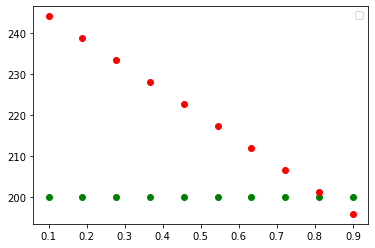

In [30]:
fig, ax = plt.subplots()

for social_pref, economic_pref in zip(social_preferences, economic_preferences):
    ax.scatter(social_pref, shareholder_utility(social_pref, economic_pref, clean), color="green")
    ax.scatter(social_pref, shareholder_utility(social_pref, economic_pref, dirty), color="red")
    
ax.legend()